In [1]:
import numpy as np
import sbi_tvb
from matplotlib import rcParams
from sbi_tvb.inference import TvbInference
from tvb.simulator.lab import *

/opt/conda/lib/python3.8/site-packages/tvb_library-2.2-py3.8.egg/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [2]:
rcParams['figure.figsize'] = 15, 6

In [29]:
#
# Simulation setup
#
dt = 0.005
nsigma = 0.035
seed = 42
sim_len = 30e3
G = 2.45
BOLD_TR = 2250

In [4]:
# Define connectivity
sbi_tvb_path = os.path.dirname(os.path.dirname(sbi_tvb.__file__))
weights = np.loadtxt(os.path.join(sbi_tvb_path, 'data_input_files', 'SC_Schaefer7NW100p_nolog10.txt'))

In [5]:
print("Build TvbInference object")
tvb_inference = TvbInference('results', num_simulations=3000, num_workers=40)
tvb_inference

Build TvbInference object


In [6]:
print("Build prior")
tvb_inference.build_prior(1.5, 3.2)

Build prior


In [30]:
print("Simulation setup")
tvb_inference.simulation_setup(weights, sim_len, nsigma, BOLD_TR, dt, seed)

Simulation setup


In [8]:
print("Sbi inference")
tvb_inference.sbi_infer()

Sbi inference
FC_Corr
FC_Corr


/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:211: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1086: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1090: RuntimeWarning: overflow encountered in square
  s = s**2
/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1092: RuntimeWarning: overflow encountered in multiply
  s *= a_zero_mean
/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1234: RuntimeWarning: overflow enco

Running 3000 simulations in 3000 batches.:   0%|          | 0/3000 [00:00<?, ?it/s]

WARNING  Found 558 NaN simulations and 520 Inf simulations. They will be excluded from training.


/opt/conda/lib/python3.8/site-packages/sbi-0.17.0-py3.8.egg/sbi/neural_nets/flow.py:108: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn(f"In one-dimensional output space, this flow is limited to Gaussians")


Neural network successfully converged after 68 epochs.


DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: tensor([1.5000]), high: tensor([3.2000])), 1),
               x_shape=torch.Size([1, 1404]))
               

In [9]:
print("Run observed simulation")
BOLD_obs = tvb_inference.run_sim(G)

Run observed simulation


Posterior Distribution
FC_Corr


/opt/conda/lib/python3.8/site-packages/sbi-0.17.0-py3.8.egg/sbi/inference/posteriors/direct_posterior.py:333: UserWarning: You set `sample_with_mcmc=True`. This is deprecated since `sbi v0.17.0` and will lead to an error in future versions. Please use `sample_with='mcmc'` instead.
  warn(
Generating samples: 100%|██████████| 1000/1000 [03:49<00:00,  4.36it/s]


Plot G posterior


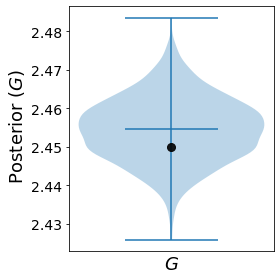

In [10]:
print("Posterior Distribution")
found_value = tvb_inference.posterior_distribution(BOLD_obs, G, True)

In [11]:
print("G value found: {}".format(found_value))

G value found: 2.454610586166382


In [12]:
loaded_simulations = np.load(tvb_inference.sim_results_path)
theta_sim = loaded_simulations['theta']
x_sim = loaded_simulations['x']
theta_sim, x_sim

(array([[2.6149907],
        [2.2797544],
        [3.000496 ],
        ...,
        [3.142301 ],
        [1.7531784],
        [2.9578881]], dtype=float32),
 array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.11692659,  0.11560603,  0.11736979, ...,  0.12669663,
          0.1374433 , -0.0015202 ],
        [        inf,         inf,         inf, ...,         nan,
                 nan,         nan],
        ...,
        [        inf,         inf,         inf, ...,         nan,
                 nan,         nan],
        [ 0.11292125,  0.11289614,  0.11480594, ...,  0.06185083,
          0.12965645,  0.00160264],
        [        inf,         inf,         inf, ...,         nan,
                 nan,         nan]], dtype=float32))

In [16]:
import torch
# Train network
tvb_inference.train_network(torch.as_tensor(theta_sim), torch.as_tensor(x_sim))

WARNING  Found 558 NaN simulations and 520 Inf simulations. They will be excluded from training.


/opt/conda/lib/python3.8/site-packages/sbi-0.17.0-py3.8.egg/sbi/neural_nets/flow.py:108: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn(f"In one-dimensional output space, this flow is limited to Gaussians")


Neural network successfully converged after 52 epochs.


DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: tensor([1.5000]), high: tensor([3.2000])), 1),
               x_shape=torch.Size([1, 1404]))
               

In [17]:
print("Run observed simulation")
G=2.0
BOLD_obs = tvb_inference.run_sim(G)

Run observed simulation


/opt/conda/lib/python3.8/site-packages/sbi-0.17.0-py3.8.egg/sbi/inference/posteriors/direct_posterior.py:333: UserWarning: You set `sample_with_mcmc=True`. This is deprecated since `sbi v0.17.0` and will lead to an error in future versions. Please use `sample_with='mcmc'` instead.
  warn(
Tuning bracket width...:   0%|          | 0/50 [00:00<?, ?it/s]

Posterior Distribution
FC_Corr


Generating samples: 100%|██████████| 1000/1000 [05:31<00:00,  3.02it/s]

Plot G posterior


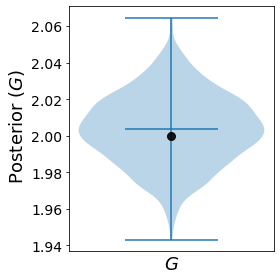

In [18]:
print("Posterior Distribution")
found_value = tvb_inference.posterior_distribution(BOLD_obs, G, True)

In [19]:
print("G value found: {}".format(found_value))

G value found: 2.0037059783935547


In [24]:
#Try with a different TS with different simulations params.

#
# Simulation setup
#
dt = 0.05
nsigma = 0.02
seed = 42
sim_len = 30e3
G = 3
BOLD_TR = 2250
tvb_inference2 = TvbInference('results-vbc-test2', num_simulations=3000, num_workers=40)

In [25]:
print("Simulation setup")
tvb_inference2.simulation_setup(weights, sim_len, nsigma, BOLD_TR, dt, seed)

Simulation setup


In [26]:
BOLD_obs2 = tvb_inference2.run_sim(G)

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:211: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1086: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1090: RuntimeWarning: overflow encountered in square
  s = s**2
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: Runti

FC_Corr


Generating samples: 100%|██████████| 1000/1000 [02:04<00:00,  8.05it/s]

Plot G posterior


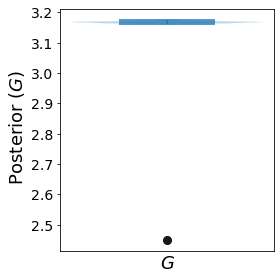

3.167228

In [31]:
tvb_inference.trained = True
found_value = tvb_inference.posterior_distribution(BOLD_obs2, G, True)
found_value